# Qiskit Summer School 2021
## Day 2 Lecture 1


These are my personal notes & interpretations of the lectures done on the first day of the 2021 Qiskit summer school.

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\newcommand{\ketbra}[2]{\left|{#1}\middle\rangle\langle{#2}\right|}
\newenvironment{rcases}
  {\left.\begin{aligned}}
  {\end{aligned}\right\rbrace}
$$

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

#### Grovers algorithm

The algorithm itself is about searching an unsorted database with $N=2^n$ elements. In comparison to classical algorithms that need, on average, $O(N)$, it only needs $O(\sqrt{N})$.

The goal is to find $w$ with a given oracle $U_f$. The oracle itself is defined as:

$$
f: \{0,1\}^n \rightarrow \{0,1\} \\
f(x) = \begin{cases} 
      1 \text{ if } x = w \\
      0 \text{ otherwise } \\
   \end{cases} \\
f_o(x) = \begin{cases} 
      0 \text{ if } x = 00..0 \\
      1 \text{ otherwise } \\
   \end{cases} \\
$$

The quantum circuit is, in some regards, comparable to a DJA. The single `barrier` referrs to the state $\ket{s}$. The output of the circuit is $y \in \{0,1\}^n$. Everything after the `barrier` and before the `measurments` is repeated $r$ times.

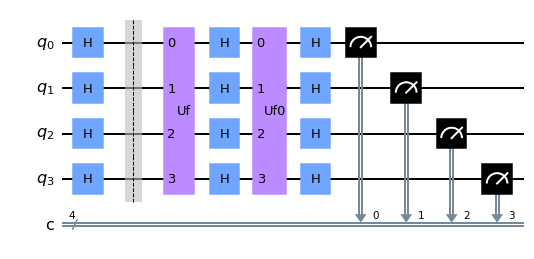

In [4]:
n = 4
circuit = QuantumCircuit(n,n)
circuit.h(range(n))
circuit.barrier()
Uf = QuantumCircuit(n,n)
Uf.name = "Uf"
circuit.append(Uf, range(n))
circuit.h(range(n))
Uf0 = QuantumCircuit(n,n)
Uf0.name = "Uf0"
circuit.append(Uf0, range(n))
circuit.h(range(n))
circuit.measure(range(n), range(n))
circuit.draw('mpl');

The claim here is that $y = w$ with a high probability.